In [4]:

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv("curr_c.csv")  #just give the name of file if it is present in same folder otherwise shd give path
df

,cur_after300ms_c,cur_c_arr.1,cur_c_arr.10,cur_c_arr.11,cur_c_arr.12,cur_c_arr.13,cur_c_arr.14,cur_c_arr.15,cur_c_arr.16,cur_c_arr.17,...,cur_c_arr.35,cur_c_arr.36,cur_c_arr.37,cur_c_arr.38,cur_c_arr.4,cur_c_arr.5,cur_c_arr.6,cur_c_arr.7,cur_c_arr.8,cur_c_arr.9
0,3.95,0.12,0.34,0.25,0.17,0.16,0.21,0.30,0.40,0.50,...,2.07,1.59,1.11,0.74,0.47,0.56,0.63,0.61,0.55,0.46
1,3.95,0.10,0.43,0.31,0.23,0.14,0.21,0.30,0.38,0.49,...,2.34,1.98,1.62,0.88,0.41,0.54,0.67,0.76,0.73,0.64
2,3.95,0.09,0.38,0.27,0.20,0.15,0.26,0.36,0.48,0.59,...,2.21,1.85,1.36,0.73,0.36,0.48,0.59,0.66,0.65,0.57
3,3.95,0.14,0.55,0.42,0.25,0.16,0.17,0.20,0.34,0.54,...,2.53,2.17,1.76,1.38,0.57,0.72,0.86,0.92,0.82,0.69
4,4.00,0.15,0.62,0.49,0.34,0.22,0.19,0.22,0.29,0.44,...,2.61,2.25,1.71,1.43,0.59,0.74,0.90,1.01,0.95,0.79
5,3.65,0.05,0.21,0.15,0.15,0.24,0.43,0.55,0.60,0.63,...,1.87,1.52,0.86,0.26,0.20,0.28,0.36,0.43,0.47,0.40
6,3.95,0.06,0.28,0.22,0.20,0.30,0.39,0.48,0.52,0.54,...,1.94,1.58,0.78,0.46,0.24,0.33,0.41,0.50,0.54,0.43
7,4.00,0.06,0.28,0.19,0.16,0.13,0.27,0.40,0.48,0.57,...,2.09,1.73,1.36,0.40,0.25,0.35,0.45,0.55,0.59,0.53
8,4.00,0.11,0.49,0.41,0.32,0.25,0.26,0.28,0.34,0.48,...,2.40,2.00,1.50,1.19,0.45,0.58,0.70,0.76,0.72,0.60
9,3.95,0.07,0.29,0.21,0.17,0.21,0.33,0.45,0.53,0.59,...,2.04,1.68,0.87,0.50,0.28,0.38,0.48,0.55,0.56,0.47


In [6]:
df.shape

(313, 39)

In [7]:
X = df.iloc[:, 1:].values  #feature matrix

In [8]:
X.shape , type(X)

((313, 38), numpy.ndarray)

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics
from sklearn.metrics import pairwise_distances


In [10]:
wcss = []  #“Within cluster sum of squares by cluster”
for i in range (1, 11):
    kmeans = KMeans(n_clusters= i, init= 'k-means++', n_init = 10, max_iter = 300, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [11]:
wcss

[259.0877303514377,
 100.71110216791982,
 62.619327575972136,
 51.61260725163858,
 44.24852764300237,
 39.54938420752306,
 35.519591840935625,
 32.54317505080428,
 30.018617723277917,
 27.85661845167981]

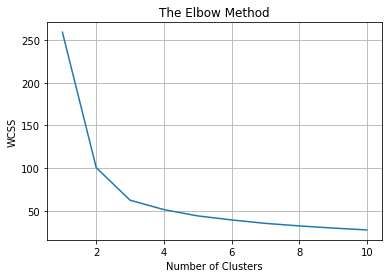

In [12]:
plt.plot(range (1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

plt.grid()

In [13]:
kmeans = KMeans(n_clusters= 5, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 0)

In [14]:
y_kmeans = kmeans.fit(X)

In [15]:
y_kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [16]:
labels = y_kmeans.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

0.3021212747878139

In [17]:
y_kmeans = kmeans.predict(X)
y_kmeans

array([2, 0, 2, 3, 3, 1, 4, 4, 0, 4, 4, 2, 2, 1, 0, 0, 0, 0, 0, 0, 3, 3,
       3, 1, 1, 0, 4, 1, 1, 1, 4, 0, 0, 4, 1, 0, 2, 2, 4, 1, 0, 4, 0, 0,
       2, 1, 4, 2, 1, 4, 0, 2, 2, 2, 1, 1, 1, 1, 1, 4, 1, 1, 4, 2, 1, 4,
       2, 4, 2, 2, 4, 4, 3, 0, 4, 1, 2, 4, 4, 2, 4, 1, 4, 4, 0, 0, 0, 0,
       2, 4, 0, 4, 4, 4, 2, 0, 4, 2, 2, 4, 1, 4, 1, 4, 1, 4, 2, 1, 4, 3,
       0, 2, 0, 3, 3, 0, 0, 4, 2, 0, 2, 4, 2, 0, 3, 2, 2, 4, 4, 2, 0, 2,
       0, 4, 1, 1, 0, 0, 2, 4, 1, 1, 1, 0, 0, 0, 0, 4, 2, 0, 0, 4, 2, 2,
       0, 0, 0, 3, 0, 1, 4, 0, 0, 0, 3, 2, 3, 2, 2, 4, 4, 4, 4, 1, 1, 4,
       4, 1, 1, 4, 2, 1, 0, 0, 0, 0, 2, 0, 3, 2, 4, 4, 2, 2, 2, 4, 2, 4,
       1, 1, 1, 1, 4, 2, 2, 3, 4, 4, 2, 2, 4, 4, 2, 4, 4, 1, 1, 3, 2, 0,
       1, 4, 0, 2, 1, 4, 1, 1, 1, 1, 1, 4, 2, 4, 0, 2, 1, 0, 2, 1, 1, 4,
       4, 1, 3, 2, 4, 2, 0, 4, 2, 3, 2, 4, 1, 1, 4, 1, 1, 1, 1, 4, 2, 0,
       0, 2, 2, 0, 0, 4, 4, 1, 1, 1, 4, 2, 4, 2, 2, 2, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 4, 4, 4, 0, 4, 2, 1, 1, 1, 1, 0, 0,

In [18]:
{i: np.where(y_kmeans == i)[0] for i in range(kmeans.n_clusters)}

{0: array([  1,   8,  14,  15,  16,  17,  18,  19,  25,  31,  32,  35,  40,
         42,  43,  50,  73,  84,  85,  86,  87,  90,  95, 110, 112, 115,
        116, 119, 123, 130, 132, 136, 137, 143, 144, 145, 146, 149, 150,
        154, 155, 156, 158, 161, 162, 163, 182, 183, 184, 185, 187, 219,
        222, 234, 237, 248, 263, 264, 267, 268, 292, 299, 300, 306, 309,
        310], dtype=int64),
 1: array([  5,  13,  23,  24,  27,  28,  29,  34,  39,  45,  48,  54,  55,
         56,  57,  58,  60,  61,  64,  75,  81, 100, 102, 104, 107, 134,
        135, 140, 141, 142, 159, 173, 174, 177, 178, 181, 198, 199, 200,
        201, 215, 216, 220, 224, 226, 227, 228, 229, 230, 236, 239, 240,
        243, 254, 255, 257, 258, 259, 260, 271, 272, 273, 280, 281, 282,
        283, 295, 296, 297, 298, 303], dtype=int64),
 2: array([  0,   2,  11,  12,  36,  37,  44,  47,  51,  52,  53,  63,  66,
         68,  69,  76,  79,  88,  94,  97,  98, 106, 111, 118, 120, 122,
        125, 126, 129, 131, 138, 1